In [60]:
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline 

In [48]:
stockdata = yf.download(
    "TCS.NS",
    start = "2015-12-31",
    end = "2025-3-6",
    progress = False
)

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-12-31,1006.719666,1011.532512,994.594455,998.002723,1240318
2016-01-01,998.270813,1007.607437,996.556392,1007.607437,712262
2016-01-04,978.936829,997.279459,977.470221,995.688895,1870184
2016-01-05,970.405823,985.959973,967.121513,985.298936,2678020
2016-01-06,983.894348,985.773978,970.922218,970.922218,2653228
...,...,...,...,...,...
2025-02-27,3612.550049,3638.000000,3600.699951,3611.699951,3823856
2025-02-28,3483.250000,3600.000000,3457.000000,3584.949951,7085018


<Axes: xlabel='Date'>

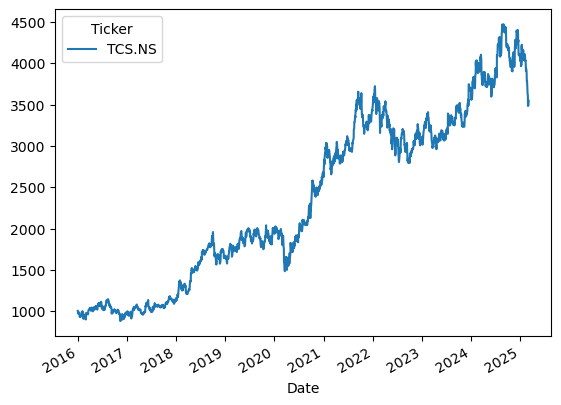

In [49]:
display(stockdata)
stockdata.Close.plot()


<h1>Time Series ForecastingUsing ARIMA Model</h2>

In [4]:
from statsmodels.tsa.arima.model import ARIMA 
# Train ARIMA Model
model = ARIMA(stockdata["Close"], order=(5,1,0))  # (p,d,q)
model_fit = model.fit()

# Forecast next 10 days
forecast = model_fit.forecast(steps=10)
print(forecast)


2268    3546.702153
2269    3543.708637
2270    3543.636793
2271    3544.388722
2272    3544.697293
2273    3544.693489
2274    3544.627045
2275    3544.620339
2276    3544.634876
2277    3544.641323
Name: predicted_mean, dtype: float64


/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Pred

/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


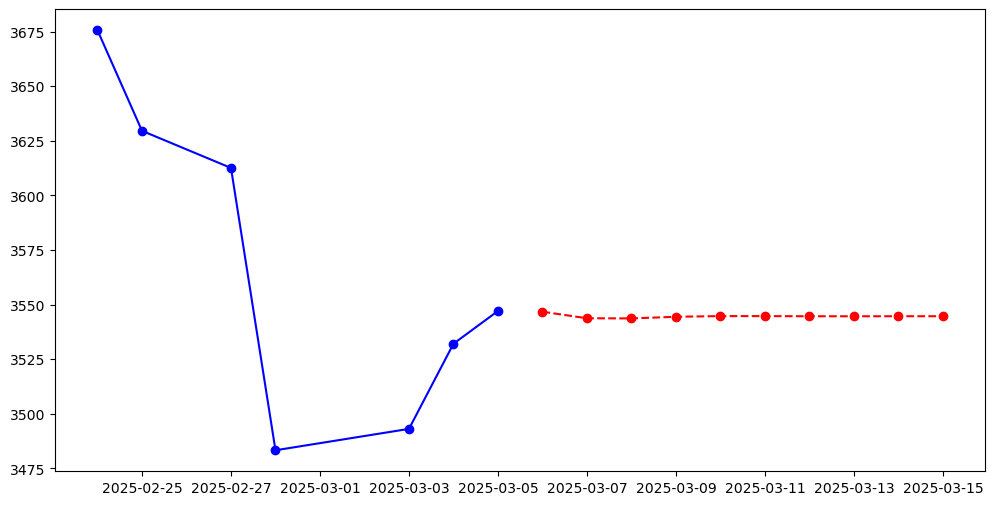

In [5]:
model = ARIMA(stockdata["Close"], order=(5,1,0))  # (p,d,q)
model_fit = model.fit()

# Forecast next 10 days
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Create a future date range for the forecast
future_dates = pd.date_range(start=stockdata.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Select the last 7 days before forecasting for plotting
last_7_days = stockdata["Close"].iloc[-7:]

# Plot actual last 7 days and forecast
plt.figure(figsize=(12,6))
plt.plot(last_7_days.index, last_7_days, label="Actual Close Price (Last 7 Days)", color="blue", marker="o")
plt.plot(future_dates, forecast, label="ARIMA Forecast (Next 10 Days)", color="red", linestyle="dashed", marker="o")

<h1> Using LSTM Model for Forecasting</h1>

<h3>Feature Engineering & Creating Sequence Length for Model</h3>

In [52]:
df = stockdata[['Close']].copy()
df.info()
# df=df.fillna(method='ffill')

scaler = MinMaxScaler(feature_range=(-1, 1))
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2268 entries, 2015-12-31 to 2025-03-05
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, TCS.NS)  2268 non-null   float64
dtypes: float64(1)
memory usage: 35.4 KB


<h3>Creating Training and Testing Dataset & Converting to pytorch Tensors</h3>

In [91]:
def load_data(stock, look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data)
    test_set_size = int(np.round(0.2*data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

look_back = 60 # choose sequence length
x_train, y_train, x_test, y_test = load_data(df, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

x_train.shape =  (1766, 59, 1)
y_train.shape =  (1766, 1)
x_test.shape =  (442, 59, 1)
y_test.shape =  (442, 1)


<h3>LSTM Model</h3>


In [92]:
input_dim = 1
hidden_dim = 32
num_layers = 2 
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        
        out = self.fc(out[:, -1, :]) 
        
        return out
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
10
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


<h3>Training The Model</h3>

In [93]:
num_epochs = 500
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.06916134059429169
Epoch  20 MSE:  0.012125477194786072
Epoch  30 MSE:  0.009692296385765076
Epoch  40 MSE:  0.0017732606502249837
Epoch  50 MSE:  0.0015356497606262565
Epoch  60 MSE:  0.0012827651808038354
Epoch  70 MSE:  0.001024038647301495
Epoch  80 MSE:  0.0009452010272070765
Epoch  90 MSE:  0.0008906442089937627
Epoch  100 MSE:  0.000862861517816782
Epoch  110 MSE:  0.0008421230013482273
Epoch  120 MSE:  0.0008248619851656258
Epoch  130 MSE:  0.0008093527285382152
Epoch  140 MSE:  0.0007941194926388562
Epoch  150 MSE:  0.0007792880642227829
Epoch  160 MSE:  0.0007648351020179689
Epoch  170 MSE:  0.0007506871479563415
Epoch  180 MSE:  0.0007368418155238032
Epoch  190 MSE:  0.0007233425858430564
Epoch  200 MSE:  0.0007102752570062876
Epoch  210 MSE:  0.0006977796438150108
Epoch  220 MSE:  0.0006860420107841492
Epoch  230 MSE:  0.000675239076372236
Epoch  240 MSE:  0.000665458501316607
Epoch  250 MSE:  0.0006566460360772908
Epoch  260 MSE:  0.0006486210622824728
Epo

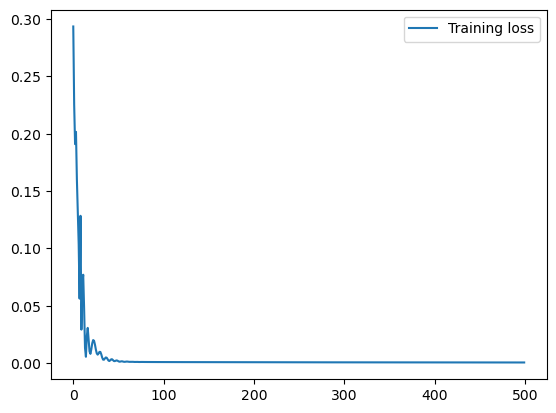

In [95]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [96]:
y_test_pred = model(x_test)

In [97]:
y_train_pred = scaler.inverse_transform(y_train_pred.detach())
y_train = scaler.inverse_transform(y_train.detach())
y_test_pred = scaler.inverse_transform(y_test_pred.detach())
y_test = scaler.inverse_transform(y_test.detach())

In [98]:
import math

In [99]:
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 40.24 RMSE


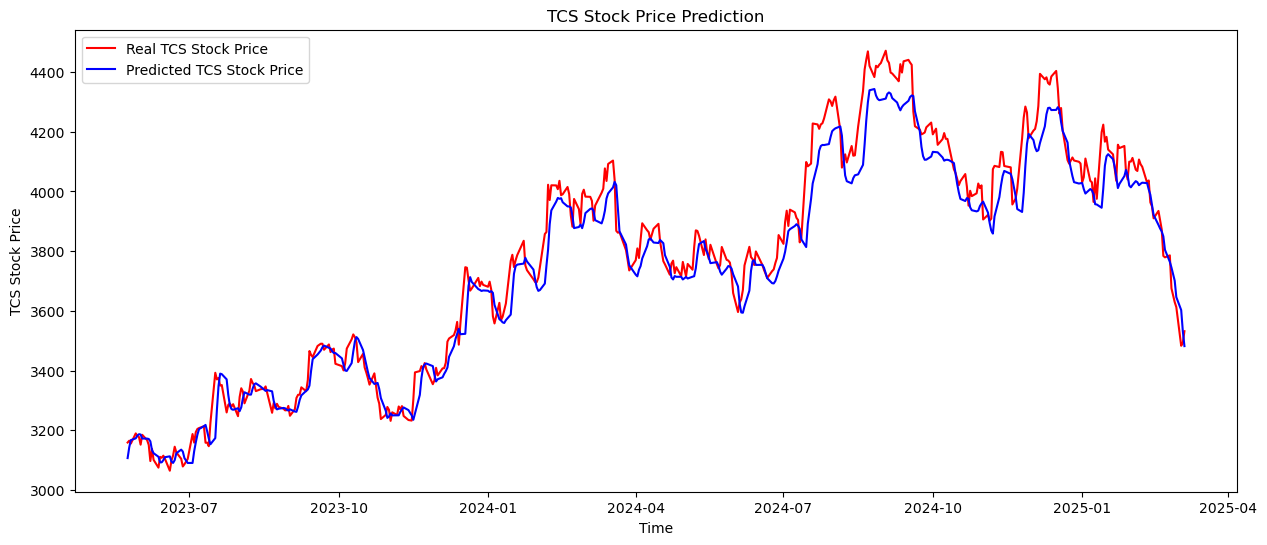

In [100]:
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(df[len(df)-len(y_test):].index, y_test, color = 'red', label = 'Real TCS Stock Price')
axes.plot(df[len(df)-len(y_test):].index, y_test_pred, color = 'blue', label = 'Predicted TCS Stock Price')
#axes.xticks(np.arange(0,394,50))
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.savefig('tcs_pred.png')
plt.show()